In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def gold_ratio(f, b, counter_F, a = -2, e = 1e-7):
    t = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / t
    Xk2 = Ak + (Bk - Ak) / t
    y1, y2 = f(Xk1), f(Xk2)
    counter_F += 2
    while lk >= e:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
        lk = Bk - Ak
        counter_F += 1
    return (Ak + Bk) / 2, counter_F

In [ ]:
def scalar_mult(u, v):
  sum = 0
  for i in range(0, len(u)):
    sum += u[i]*v[i]
  return sum

In [ ]:
func = 1 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 1
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
if func == 2:
  X = np.array([0, np.sqrt(10)])
  F = lambda x, y: 10 * x ** 2 + 7 * y ** 2 - 4 * x * y - 4 * np.sqrt(5) * (5 * x - y) - 16

f = lambda X: F(X[0], X[1])

eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
method = 3 #метод:

data = {f(X)}
Xline1 = np.array([X[0]])
Yline1 = np.array([X[1]])
data_crit1 = np.array([])
data_crit2 = np.array([])
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

while (True):
  if method == 1:
    method_name = "Метод циклического покоординатного спуска"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1])
    phi1 = lambda kappa1_: f(X + kappa1_ * u(0))
    kappa1, counter_F = gold_ratio(phi1, 6, counter_F)
    X = X + kappa1 * u(0)
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])
    phi2 = lambda kappa2_: f(X + kappa2_ * u(1))
    kappa2, counter_F = gold_ratio(phi2, 6, counter_F)
    X = X + kappa2 * u(1)
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])

  if method == 2:
    method_name = "Метод Хука — Дживса"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1.0])
    phi = lambda kappa_: f(X + kappa_ * u(0))
    kappa0, counter_F = gold_ratio(phi, 4, counter_F)
    X = X + kappa0 * u(0)
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])
    phi = lambda kappa_: f(X + kappa_ * u(1))
    kappa1, counter_F = gold_ratio(phi, 4, counter_F)
    X = X + kappa1 * u(1)
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])
    u2_not_normed = kappa0 * u(0) + kappa1 * u(1)
    u2 = u2_not_normed / np.linalg.norm(u2_not_normed)
    phi = lambda kappa_: f(X + kappa_ * u2)
    kappa2, counter_F = gold_ratio(phi, 4, counter_F)
    X = X + kappa2 * u2
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])

  if method == 3:
    method_name = "Метод Розенброка"
    Xprev = X
    iterations += 1
    if iterations == 1:
      u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1.0])
      p1, p2 = u(0), u(1)
    phi1 = lambda kappa1_: f(X + kappa1_ * p1)
    kappa1, counter_F = gold_ratio(phi1, 1, counter_F)
    X = X + kappa1 * p1
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])
    phi2 = lambda kappa2_: f(X + kappa2_ * p2)
    kappa2, counter_F = gold_ratio(phi2, 1, counter_F)
    X = X + kappa2 * p2
    Xline1 = np.append(Xline1, X[0])
    Yline1 = np.append(Yline1, X[1])
    a1 = kappa1 * p1 + kappa2 * p2
    a2 = kappa2 * p2
    b1 = a1
    p1 = b1 / np.linalg.norm(b1)
    b2 = a2 - scalar_mult(a2, p1) * p1
    p2 = b2 / np.linalg.norm(b2)


  if method == 4:
    method_name = "Метод Пауэлла"
    Xprev = X
    iterations += 1
    for i in range(2):
      if iterations == 1:
        u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1.0])
        p1, p2 = u(0), u(1)

      phi1 = lambda kappa1_: f(X + kappa1_ * p1)
      kappa1, counter_F = gold_ratio(phi1, 1, counter_F)
      X = X + kappa1 * p1
      Xline1 = np.append(Xline1, X[0])
      Yline1 = np.append(Yline1, X[1])
      phi2 = lambda kappa2_: f(X + kappa2_ * p2)
      kappa2, counter_F = gold_ratio(phi2, 1, counter_F)
      X = X + kappa2 * p2
      Xline1 = np.append(Xline1, X[0])
      Yline1 = np.append(Yline1, X[1])
      p = kappa1 * p1 + kappa2 * p2
      p3 = p / np.linalg.norm(p)
      phi3 = lambda kappa2_: f(X + kappa2_ * p3)
      kappa3, counter_F = gold_ratio(phi3, 1, counter_F)
      X = X + kappa3 * p3
      Xline1 = np.append(Xline1, X[0])
      Yline1 = np.append(Yline1, X[1])
      p1 = p2
      p2 = p3

  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data_crit1 = np.append(data_crit1, abs(f(X) - f(Xprev)))
  data_crit2 = np.append(data_crit2, np.linalg.norm(X - Xprev))
  data.add(f(X))
  print(abs(f(X) - f(Xprev)), np.linalg.norm(X - Xprev), X)

  if (abs(f(X) - f(Xprev)) < eps and (np.linalg.norm(X - Xprev)) < eps):
      break
X_min = X

10.999999818515874 1.4142134982087697 [-4.53710296e-08 -1.00000005e+00]
1.6281394387953356 1.036354961368867 [ 0.45924697 -0.07095549]
0.36460218453883214 1.0002313281569009 [0.92166898 0.81596536]
0.007037991354421467 0.16433485077969967 [0.98621545 0.96709344]
0.00022056541623291382 0.03558744186152065 [0.99996565 0.99991718]
1.379302824336998e-09 8.96274952070719e-05 [1.         0.99999996]


==================== Метод Розенброка ====================
eps =  0.001
x* =  1.0000000012708767 0.9999999641945387
f(x*) =  1.4721240057624461e-15
iterations =  6
counter_F =  457


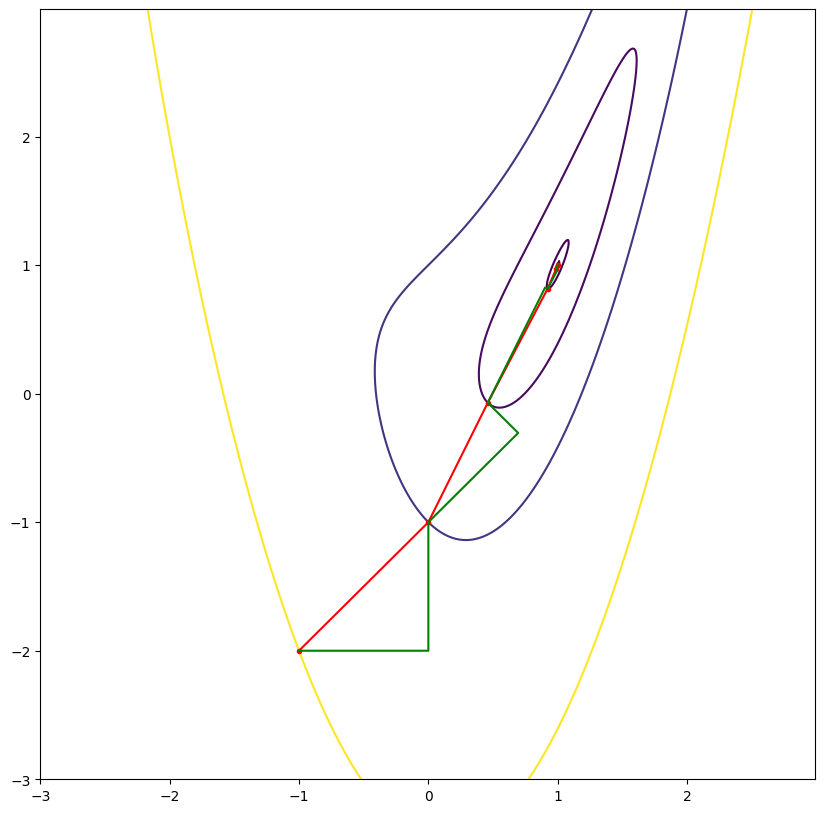

In [ ]:
print("==================== " + method_name + " ====================")
print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)

iters = np.arange(1, iterations+1, 1)

#plt.figure(figsize=(10, 10))
#plt.axhline (np.log(eps), color='red', linestyle='--')
#plt.plot(iters, np.log(data_crit1))
#plt.plot(iters, np.log(data_crit2))
if func == 1:
  x_space = np.arange(-3, 3, 0.01)
  y_space = np.arange(-3, 3, 0.01)
if func == 2:
  x_space = np.arange(-10, 10, 0.01)
  y_space = np.arange(-10, 10, 0.01)

xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2


fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")
plt.plot(Xline1, Yline1, "g")

In [ ]:
func = 1 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 200
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
if func == 2:
  X = np.array([0, np.sqrt(10)])
  F = lambda x, y: 10 * x ** 2 + 7 * y ** 2 + 4 * x * y - 4 * np.sqrt(5) * (5 * x - y) - 16

f = lambda X: F(X[0], X[1])

a = 1
eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
method = 1 #метод:

data = [f(X)]
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

while (True):
  if method == 1:
    method_name = "Метод циклического покоординатного спуска"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1.0])
    phi1 = lambda kappa1_: f(X + kappa1_ * u(0))
    kappa1, counter_F = gold_ratio(phi1, 5, counter_F)
    phi2 = lambda kappa2_: f(X + kappa2_ * u(1))
    kappa2, counter_F = gold_ratio(phi2, 5, counter_F)
    X = X + kappa1 * u(0) + kappa2 * u(1)


  if method == 2:
    method_name = "Метод Хука — Дживса"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1, 0]) if i == 0 else np.array([0, 1])
    phi = lambda kappa_: f(X + kappa_ * u(0))
    kappa0, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = X + kappa0 * u(0)
    phi = lambda kappa_: f(X + kappa_ * u(1))
    kappa1, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = X + kappa1 * u(1)
    u2 = kappa0 * u(0) + kappa1 * u(1)
    phi = lambda kappa_: f(X + kappa_ * u2)
    kappa2, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = Xprev + kappa0 * u(0) + kappa1 * u(1) + kappa2 * u2


  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.append(f(X))
  print(abs(f(X) - f(Xprev)), np.linalg.norm(X - Xprev), X)

  if (abs(f(X) - f(Xprev)) < eps and (np.linalg.norm(X - Xprev)) < eps):
      break
X_min = X

Выходные данные были обрезаны до нескольких последних строк (5000).
0.0024786381219398246 0.00797577784158029 [0.41719027 0.17743326]
1.6541198791013516 0.8281099022308397 [-0.41091271  0.1740477 ]
1.6462648690365158 0.8322149688860356 [0.42128602 0.16884922]
0.0025700641186676143 0.010576463568689064 [0.41517554 0.17748192]
1.646011153408792 0.8261643448559789 [-0.41097299  0.17237074]
1.6464554026230793 0.8303043239200385 [0.41932407 0.16889881]
0.002519247684469983 0.00805019160602508 [0.41523425 0.1758327 ]
1.646195438464828 0.8241655987495343 [-0.40892428  0.17241946]
1.6383538121935393 0.8283218307909641 [0.41938122 0.16721907]
0.0026114380539017934 0.010616678767983884 [0.41324182 0.17588057]
1.6381758497786616 0.8222416290495395 [-0.40898392  0.17076882]
1.638541365494293 0.8264331448501145 [0.41744181 0.16726781]
0.002560403852502613 0.00812496930317467 [0.41329976 0.17425769]
0.0025147251520259983 0.008921599176963958 [0.42153106 0.17081667]
1.671841989747091 0.82418537123335

KeyboardInterrupt: ignored

==================== Метод Хука — Дживса ====================
eps =  0.001
x* =  0.9925651877231827 0.9851715413823506
f(x*) =  5.531625482005248e-05
iterations =  2
counter_F =  235


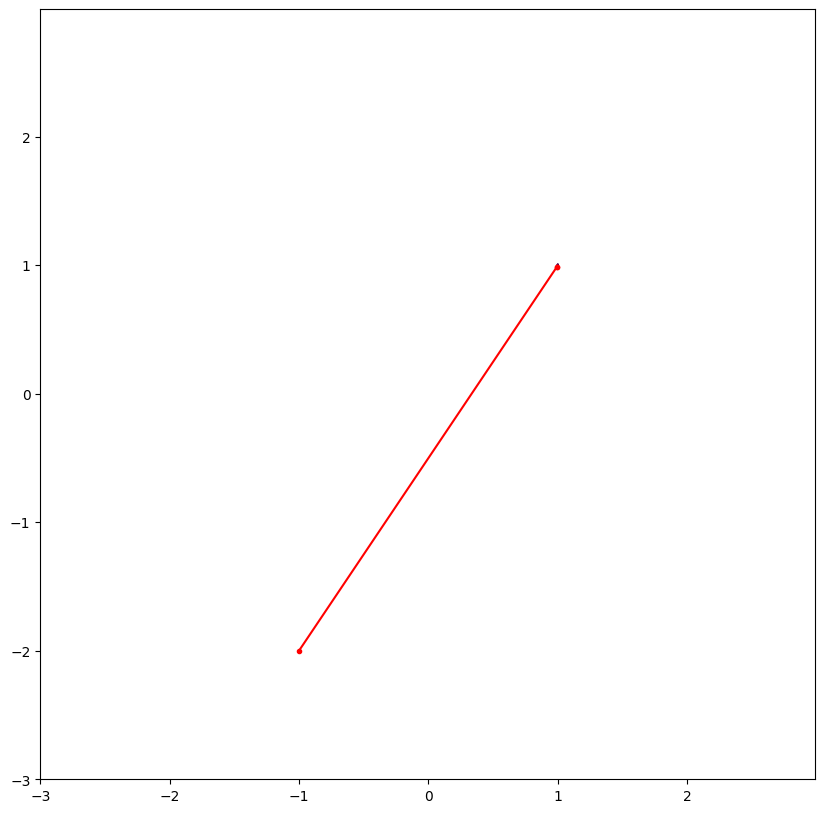

In [ ]:
print("==================== " + method_name + " ====================")
print("eps = ", eps)
print("x* = ", X_min[0], X_min[1])
print("f(x*) = ", F(X_min[0], X_min[1]))
print("iterations = ", iterations)
print("counter_F = ", counter_F)



if func == 1:
  x_space = np.arange(-3, 3, 0.01)
  y_space = np.arange(-3, 3, 0.01)
if func == 2:
  x_space = np.arange(-10, 10, 0.01)
  y_space = np.arange(-10, 10, 0.01)

xgrid, ygrid = np.meshgrid(x_space, y_space)
z = ((xgrid**2-ygrid)**2)+(xgrid-1)**2


fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot()
axes.contour(xgrid, ygrid, z, sorted(data))
plt.plot(X_line, Y_line, color = "r", marker = ".")

In [ ]:
func = 1 # функция: 1 - Розенброка, 2 - квадратичная
if func == 1:
  alpha = 200
  X = np.array([-1, -2])
  F = lambda x, y: alpha * (x ** 2 - y) ** 2 + (x - 1) ** 2 #Ф-я Розенброка
if func == 2:
  X = np.array([0, np.sqrt(10)])
  F = lambda x, y: 10 * x ** 2 + 7 * y ** 2 + 4 * x * y - 4 * np.sqrt(5) * (5 * x - y) - 16

f = lambda X: F(X[0], X[1])

a = 1
eps = 1e-3
#счетчики
iterations = 0 #итераций
counter_F = 0 #вычисленных функций
method = 3 #метод:

data = {f(X)}
counter_F += 1
X_line = np.array([X[0]])
Y_line = np.array([X[1]])

while (True):
  if method == 1:
    method_name = "Метод циклического покоординатного спуска"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1.0, 0]) if i == 0 else np.array([0, 1.0])
    phi = lambda kappa1_: f(X + kappa1_ * u(0))
    kappa1, counter_F = gold_ratio(phi, 5, counter_F)
    phi = lambda kappa2_: f(X + kappa1 * u(0) + kappa2_ * u(1))
    kappa2, counter_F = gold_ratio(phi, 5, counter_F)
    X = X + kappa1 * u(0) + kappa2 * u(1)


  if method == 2:
    method_name = "Метод Хука — Дживса"
    Xprev = X
    iterations += 1
    u = lambda i: np.array([1, 0]) if i == 0 else np.array([0, 1])
    phi = lambda kappa_: f(X + kappa_ * u(0))
    kappa0, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = X + kappa0 * u(0)
    phi = lambda kappa_: f(X + kappa_ * u(1))
    kappa1, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = X + kappa1 * u(1)
    u2_not_normed = kappa0 * u(0) + kappa1 * u(1)
    u2 = u2_not_normed / np.linalg.norm(u2_not_normed)
    phi = lambda kappa_: f(X + kappa_ * u2)
    kappa2, counter_F = gold_ratio(phi, 1.5, counter_F)
    X = X + kappa2 * u2


  X_line = np.append(X_line, X[0])
  Y_line = np.append(Y_line, X[1])
  data.add(f(X))
  print(abs(f(X) - f(Xprev)), np.linalg.norm(X - Xprev), X)

  if (abs(f(X) - f(Xprev)) < eps and (np.linalg.norm(X - Xprev)) < eps):
      break
X_min = X

Выходные данные были обрезаны до нескольких последних строк (5000).
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361861316 2.5953881625217456 [-1 -2]
1803.6605361

KeyboardInterrupt: ignored